In [1]:
import cv2 as cv
import argparse
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import os

from IPython.display import HTML, display
from IPython.display import IFrame
from IPython.display import YouTubeVideo
from IPython.display import Video

import group_emotion.gen.generator as ge_gen
import group_emotion.repr.representer as ge_rep

# for showing float values upto 2 decimal places
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

# make this notebook to fill screen width
display(HTML("<style>.container { width:100% !important; }</style>"))

# make output directory if it is not there
try:
    os.mkdir('output')
except FileExistsError:
    pass

In [2]:
happiness = np.array([[0.4, 0.3, 0.3], [0.5, 0.2, 0.3], [0.3, 0.5, 0.2]])
happiness_probability = np.array([[0, 0, 1]])
engagedness = np.array([[0.5, 0.2, 0.3], [0.6, 0.3, 0.1], [0.4, 0.2, 0.4]])
engagedness_probability = np.array([[0, 0, 1]])

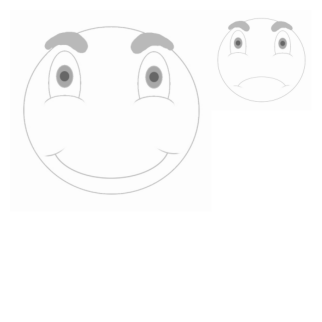

In [3]:
# case 0:
er = ge_rep.emotion_representer(500, 500, 'happy.png', 'sad.png')
happyness_image = er.get_repr(40, 20, 40)
ge_rep.display_image(happyness_image, figsize=(5, 4))

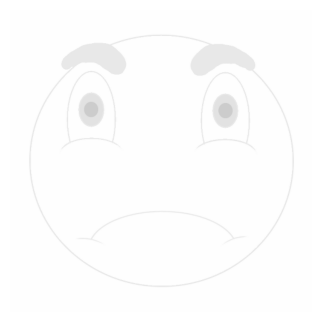

In [4]:
# case 1:
happyness_image = er.get_repr(0, 20, 80)
ge_rep.display_image(happyness_image, figsize=(5, 4))

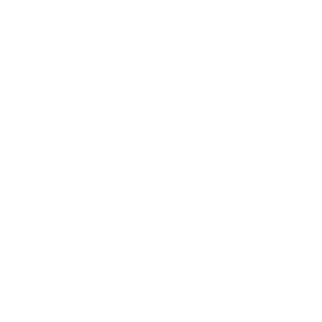

In [5]:
# case 2:
happyness_image = er.get_repr(0, 0, 100)
ge_rep.display_image(happyness_image, figsize=(5, 4))

In [6]:
emoji_window_width = 500 
emoji_window_height = 500
fps = 25
lowest_change_interval = 0.6 # seconds
video_length = 123 # seconds    # 123

In [7]:
happiness = np.array([[0.4, 0.3, 0.3], [0.5, 0.2, 0.3], [0.3, 0.5, 0.2]])
happiness_probability = np.array([[0, 0, 1]])

er = ge_rep.emotion_representer(emoji_window_width, emoji_window_height, 'happy.png', 'sad.png')

# fourcc = cv.VideoWriter_fourcc(*'XVID')
fourcc = cv.VideoWriter_fourcc(*'MJPG')
# fourcc = cv.VideoWriter_fourcc(*'FMP4')
# video_writer = cv.VideoWriter('output/emoji.avi',cv.VideoWriter_fourcc('M','J','P','G'), 25, (max_width, max_height))
video_writer = cv.VideoWriter('output/happyness.mp4',fourcc, fps, (emoji_window_width, emoji_window_height))

for i in range(int(fps * video_length / (lowest_change_interval * fps))):    # int(25*123/13)
    happiness = ge_gen.change_transition_matrix(happiness, change_probability=0.3)
    happiness_probability = ge_gen.update_probability(happiness_probability, happiness)
    happiness_image = er.get_repr(happiness_probability[0, 0], happiness_probability[0, 1], happiness_probability[0, 2])
    for j in range(int(lowest_change_interval * fps)):
        video_writer.write(happiness_image)
    
video_writer.release()

In [8]:
happiness = np.array([[0.4, 0.3, 0.3], [0.5, 0.2, 0.3], [0.3, 0.5, 0.2]])
happiness_probability = np.array([[0, 0, 1]])

er = ge_rep.emotion_representer(emoji_window_width, emoji_window_height, 'happy_abstract.png', 'sad_abstract.png')

fourcc = cv.VideoWriter_fourcc(*'MJPG')
video_writer = cv.VideoWriter('output/happyness_abstract.mp4',fourcc, fps, (emoji_window_width, emoji_window_height))

for i in range(int(fps * video_length / (lowest_change_interval * fps))):    # int(25*123/13)
    happiness = ge_gen.change_transition_matrix(happiness, change_probability=0.3)
    happiness_probability = ge_gen.update_probability(happiness_probability, happiness)
    happiness_image = er.get_repr(happiness_probability[0, 0], happiness_probability[0, 1], happiness_probability[0, 2])
    for j in range(int(lowest_change_interval * fps)):
        video_writer.write(happiness_image)
    
video_writer.release()

In [9]:
engagedness = np.array([[0.5, 0.2, 0.3], [0.6, 0.3, 0.1], [0.4, 0.2, 0.4]])
engagedness_probability = np.array([[0, 0, 1]])

er = ge_rep.emotion_representer(emoji_window_width, emoji_window_height, 'engaged.png', 'disengaged.png')

fourcc = cv.VideoWriter_fourcc(*'MJPG')
video_writer = cv.VideoWriter('output/engagedness.mp4',fourcc, fps, (emoji_window_width, emoji_window_height))

for i in range(int(fps * video_length / (lowest_change_interval * fps))):    # int(25*123/13)
    engagedness = ge_gen.change_transition_matrix(engagedness, change_probability=0.3)
    engagedness_probability = ge_gen.update_probability(engagedness_probability, engagedness)
    engagedness_image = er.get_repr(engagedness_probability[0, 0], engagedness_probability[0, 1], engagedness_probability[0, 2])
    for j in range(int(lowest_change_interval * fps)):
        video_writer.write(engagedness_image)
    
video_writer.release()

In [10]:
engagedness = np.array([[0.5, 0.2, 0.3], [0.6, 0.3, 0.1], [0.4, 0.2, 0.4]])
engagedness_probability = np.array([[0, 0, 1]])

er = ge_rep.emotion_representer(emoji_window_width, emoji_window_height, 'engaged_abstract.png', 'disengaged_abstract.png')

fourcc = cv.VideoWriter_fourcc(*'MJPG')
video_writer = cv.VideoWriter('output/engagedness_abstract.mp4',fourcc, fps, (emoji_window_width, emoji_window_height))

for i in range(int(fps * video_length / (lowest_change_interval * fps))):    # int(25*123/13)
    engagedness = ge_gen.change_transition_matrix(engagedness, change_probability=0.3)
    engagedness_probability = ge_gen.update_probability(engagedness_probability, engagedness)
    engagedness_image = er.get_repr(engagedness_probability[0, 0], engagedness_probability[0, 1], engagedness_probability[0, 2])
    for j in range(int(lowest_change_interval * fps)):
        video_writer.write(engagedness_image)
    
video_writer.release()

### Now combine all of the parts

In [44]:
fps = 25


meeting_capture = cv.VideoCapture('output/meetingView.webm')
happyness_capture = cv.VideoCapture('output/happyness.mp4')
engagedness_capture = cv.VideoCapture('output/engagedness.mp4')

captures = [meeting_capture, happyness_capture, engagedness_capture]
for capture in captures:
    if not capture.isOpened():
        print('video file couldn\'t be opened.')

fourcc = cv.VideoWriter_fourcc(*'MJPG')
video_writer = cv.VideoWriter('output/meeting_combined.mp4',fourcc, fps, (1920, 1080))

frame_no = 0
while True:
    break_loop = False
    frames_this_timestamp = []
    for capture in captures:
        ret, frame = capture.read()
        if not ret:
            break_loop = True
            break
        frames_this_timestamp.append(frame)
        
#     for frame in frames_this_timestamp:
#         print(f'frame shape: {frame.shape}')
#         break_loop = True
   
    modified_frame = frames_this_timestamp[0]
    happyness_frame = frames_this_timestamp[1]
    engagedness_frame = frames_this_timestamp[2]
    
    
    modified_frame[ : happyness_frame.shape[0], modified_frame.shape[1] - happyness_frame.shape[1] : , :] = happyness_frame
    
    modified_frame[happyness_frame.shape[0] : happyness_frame.shape[0] + engagedness_frame.shape[0], modified_frame.shape[1] - engagedness_frame.shape[1] : , :] = engagedness_frame

#     for frame in frames_this_timestamp:
#         print(frame[200:205, 200:205, 0])
    
    video_writer.write(modified_frame)
    
    
    
    
    
    if frame_no == 500:
        break_loop = True
    frame_no = frame_no + 1
    
    if break_loop:
        break

video_writer.release()
    
for capture in captures:
    capture.release()
    
